# 2018 KBO Mock Rookie Draft

## 1. 타자(wOBA)

## 2. 투수(FIP)

## 3. 투타통합(WAR)
    3.1 투수의 WAR은 fWAR을 기준으로 설정한다.
    3.2 타자의 WAR은 wOBA를 기준으로 설정한다.
    
## 4. 2018 KBO 신인 드래프트와의 비교

** References<br/> **
https://en.wikipedia.org/wiki/WOBA<br>
http://ko.yagongso.wikidok.net/wp-d/59e0e5f411f7fa6a3ea5545a/View
https://namu.wiki/w/WAR
https://namu.wiki/w/KBO%20%EB%A6%AC%EA%B7%B8/2018%EB%85%84/%EC%8B%A0%EC%9D%B8%EB%93%9C%EB%9E%98%ED%94%84%ED%8A%B8



## 1. 타자 (wOBA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re

#Import data
hitter = pd.read_csv('stat/2017hitter.csv')
hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 17 columns):
순위     619 non-null int64
이름     619 non-null object
경기     619 non-null int64
타율     619 non-null float64
타석     619 non-null int64
타수     619 non-null int64
안타     619 non-null int64
2루타    619 non-null int64
3루타    619 non-null int64
홈런     619 non-null int64
타점     619 non-null int64
득점     619 non-null int64
사사구    619 non-null int64
삼진     619 non-null int64
출루율    619 non-null float64
장타율    619 non-null float64
도루     619 non-null int64
dtypes: float64(3), int64(13), object(1)
memory usage: 82.3+ KB


### Data Cleaning for Hitter 

In [2]:
#check missing value
hitter.isnull().sum()

순위     0
이름     0
경기     0
타율     0
타석     0
타수     0
안타     0
2루타    0
3루타    0
홈런     0
타점     0
득점     0
사사구    0
삼진     0
출루율    0
장타율    0
도루     0
dtype: int64

규정타석을 채우지 못한 타자들을 거를 필요가 있다 <br/>

2017년 기준
* 전반기 주말리그 7경기
* 후반기 주말리그 7경기
* 황금사자기
* 청룡선수권
* 대통령배
* 봉황대기
* 전국체전 

전국체전을 제외한 대회를 각각 2경기를 평균으로 해서 총 19경기를 소속팀 평균 경기수로 계산했다

규정타석 : 소속팀 경기수 x 0.8 x 3 = 62.4타석 <br/>
http://www.hsbaseball.kr/board/bbs_cmu_read.php?idxno=972&menu_idxno=11&page=31&search_item=&search_word=&category=

In [3]:
hitter = hitter[hitter['타석'] >= 62.4]
hitter.shape

(339, 17)

In [4]:
#단타 지표 추가
hitter['단타'] = hitter.apply(lambda x: x[6] - (x[7] + x[8] +x[9]), axis=1)
col_names = ['순위','이름','경기','타율','타석','타수','안타','단타','2루타','3루타','홈런','타점','득점','사사구','삼진','출루율','장타율','도루']
hitter = hitter.reindex(columns=col_names)
hitter.head()

,순위,이름,경기,타율,타석,타수,안타,단타,2루타,3루타,홈런,타점,득점,사사구,삼진,출루율,장타율,도루
2,3,배지환(경북고),27,0.474,120,95,45,36,3,5,1,17,31,20,10,0.556,0.642,30
8,9,강백호(서울고),31,0.434,133,106,46,30,13,0,3,34,37,27,10,0.549,0.642,10
9,10,성영래(진흥고),20,0.433,79,67,29,21,6,2,0,15,12,5,7,0.466,0.582,2
10,11,전영수(서울디자인고),17,0.431,63,51,22,17,3,1,1,4,12,11,12,0.524,0.588,11
11,12,김지훈(송탄제일고),18,0.424,79,66,28,26,1,1,0,8,18,11,7,0.494,0.470,25


### TOP 10 HITTERS by wOBA

In [5]:
#타자 종합지표 wOBA도입
hitter['wOBA'] = hitter.apply(lambda x: (0.735*x[13] + 0.9*x[7] + 1.24*x[8] + 1.56*x[9] + 1.95*x[10])/x[5], axis=1)
hitter = hitter.sort_values(by='wOBA',ascending=0)

hitter['wOBA'] = round(hitter['wOBA'],3)

## 2. 투수 (FIP)

In [6]:
pitcher = pd.read_csv('stat/2017pitcher.csv')
pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 20 columns):
순위        233 non-null int64
이름(팀명)    233 non-null object
경기        233 non-null int64
승         233 non-null int64
패         233 non-null int64
세이브       233 non-null int64
이닝        233 non-null float64
타자        233 non-null int64
타수        233 non-null int64
피안타       233 non-null int64
피홈        233 non-null int64
희생        233 non-null int64
4구        233 non-null int64
사구        233 non-null int64
삼진        233 non-null int64
실점        233 non-null int64
자책        233 non-null int64
투구        233 non-null int64
S         233 non-null int64
방어율       233 non-null float64
dtypes: float64(2), int64(17), object(1)
memory usage: 36.5+ KB


### Data Cleaning for Pitcher 

In [7]:
pitcher.isnull().sum()

순위        0
이름(팀명)    0
경기        0
승         0
패         0
세이브       0
이닝        0
타자        0
타수        0
피안타       0
피홈        0
희생        0
4구        0
사구        0
삼진        0
실점        0
자책        0
투구        0
S         0
방어율       0
dtype: int64

규정이닝 : 소속팀 경기수(26) x 0.8 = 20.8 이닝 <br/>

In [8]:
pitcher = pitcher[pitcher['이닝'] >= 20.8]
pitcher.shape

(193, 20)

**FIP  = { ( 13 x 홈런 ) + ( 3 x 볼넷 ) – ( 2 x 삼진 ) } / 이닝 + cFIP **

### TOP 10 PITCHERS BY FIP

In [9]:
#FIP = { ( 13 x HR ) + ( 3 x BB ) – ( 2 x K ) } / 이닝 + cFIP

pitcher['FIP'] = pitcher.apply(lambda x: ( (13*x[10] + 3*x[12]) - 2*x[14])/ x[6] + 3.16, axis=1)
pitcher = pitcher.sort_values(by='FIP',ascending=True)

pitcher['FIP'] = round(pitcher['FIP'],3)

## 3. 투타통합 (WAR 기준)

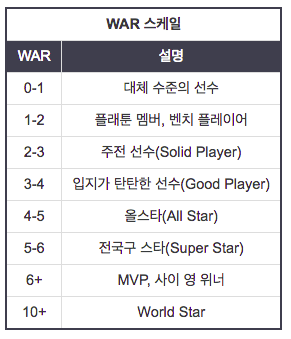

In [10]:
from IPython.display import Image
Image(filename = "pic/war_pitcher.png", width = 300)

WAR를 통한 선수가치는 위의 표와 같이 통상적으로 매겨지며, 리그 성격,경기수등에 따른 변수들에 의해 차이는 있다.

### 3.1) 투수의 WAR은 fWAR을 기준으로 설정한다

#### 3.1.1) RA(평균실점)

lgERA(리그평균자책점) = 리그자책점 / 리그경기(리그이닝수/9) <br>
lgRA(리그실점) = 리그실점 / 리그경기(리그이닝수/9) <br>
RAscale = lgERA / lgRA

RA = FIP / RAscale

#### 3.1.2) pR/W(1승에 해당하는 점수)

pR/W = [{9 * lgRA + IP/GS * RA + (9 - IP/GS) * lgRA} / 18 + 2] * 1.5

lgRA : 경기당 리그평균실점

IP/GS : 경기당 이닝 

#### 3.1.3) 피타고리안 기대승률(W%)

W% = {( lgRA/9 - RA) / pR/W} + .500

#### 3.1.4) 대체선수대비 기대 승률

대체선수대비 기대 승률 = W% - 0.325

0.325는 KBO상황을 대입하여 결정한 계수


#### 3.1.5) fWAR

fWAR = (대체 선수 대비 기대 승률) * IP/GS


http://www.kbreport.com/common/statDic/pitchingWAR
http://ko.yagongso.wikidok.net/wp-d/5a0dc4e49adb37e77efe2267/View


#### 3.1.1) RA(평균실점)

In [11]:
#리그평균실점(lgRA), 평균자책점(lgERA), RAscale

lgRA = np.sum(pitcher['실점']) / (np.sum(pitcher['이닝'] / 9))
lgERA = np.sum(pitcher['자책']) / (np.sum(pitcher['이닝'] / 9))
RAscale = lgERA / lgRA

print('lgRA = ',lgRA)
print('lgERA = ',lgERA)
print('RAscale = ',RAscale)

lgRA =  4.615074468215084
lgERA =  3.4549830781824626
RAscale =  0.748629973790803


In [12]:
pitcher['RA'] = pitcher.apply(lambda x: x[20]/RAscale, axis=1)
pitcher['RA'] = round(pitcher['RA'],3)

#### 3.1.2) pR/W(1승에 해당하는 점수)

In [13]:
pitcher['pR/W'] = pitcher.apply(lambda x: ((9 * lgRA + (x[6]/9) * (x[20] / RAscale) + (9 - (x[6]/x[2])) * lgRA) / 18 + 2) * 1.5, axis=1 )
pitcher['pR/W'] = round(pitcher['pR/W'],3)

#### 3.1.3) 피타고리안 기대승률(W%)

In [14]:
pitcher['W%'] = pitcher.apply(lambda x: ((lgRA - x[21]) / x[22]) + .500, axis=1 )
pitcher['W%'] = round(pitcher['W%'],3)

#### 3.1.4) 대체선수대비 기대승률(wW%)

In [15]:
pitcher['wW%'] = pitcher.apply(lambda x: x[23] - .325, axis=1 )
pitcher['wW%'] = round(pitcher['wW%'],3)

#### 3.1.5) Pitcher WAR(fWAR)

In [16]:
#fWAR = (대체 선수 대비 기대 승률) * IP/GS
pitcher['fWAR'] = pitcher.apply(lambda x: x[24] * (x[6]/9), axis=1 )
pitcher['fWAR'] = round(pitcher['fWAR'],3)

#rerank by fWAR
pitcher = pitcher.sort_values(by='fWAR',ascending=False)
pitcher['순위'] = pitcher['fWAR'].rank(ascending=False)
pitcher['순위'] = pitcher['순위'].astype(int)

pitcher.head()

,순위,이름(팀명),경기,승,패,세이브,이닝,타자,타수,피안타,...,자책,투구,S,방어율,FIP,RA,pR/W,W%,wW%,fWAR
53,1,김재균(충암고),25,11,0,0,115.2,476,407,92,...,29,1825,0,2.257,2.422,3.235,11.601,0.619,0.294,3.763
6,2,최민준(경남고),30,11,1,0,81.0,315,279,42,...,10,1148,0,1.111,1.617,2.160,10.504,0.734,0.409,3.681
14,3,신민혁(야탑고),23,8,3,0,81.2,307,281,49,...,13,1090,0,1.433,1.756,2.346,10.328,0.720,0.395,3.564
104,4,김범수(율곡고),25,8,2,0,87.1,350,316,79,...,32,1273,0,3.299,1.932,2.581,10.664,0.691,0.366,3.542
117,5,윤강찬(김해고),13,4,4,0,66.1,276,247,64,...,26,994,0,3.529,1.420,1.897,9.128,0.798,0.473,3.474


fWAR을 기준으로 했을때 **최민준,신민혁,김범수,윤강찬,이승헌** 순으로 정상급 투수들로 분류되었다. 

MLB WAR 스케일의 기준으로는 Solid Player 혹은 Good Player 수준으로 분류 되었다.

하지만 위 자료의 MLB의 기준이므로 보정의 필요가 있다.

Ref: https://namu.wiki/w/WAR

### 3.2) 타자의 WAR은 wOBA를 기준으로 설정한다

#### 3.2.1) Batting RAR(Runs Above Replacement level)
    
- wRAA = ((wOBA - 리그평균 wOBA) / wOBA Scale) * 타석
* RAR = RAA + 20 (PA / 600)


wOBA를 출루율 스케일로 나타내기 위해 각 이벤트(볼넷, HBP, 1루타, 2루타, 3루타, 홈런)에 곱하는 값. 이 역시 매 시즌 값이 변경되며 2012시즌 wOBA스케일은 1.245다. wOBA를 구할때 인위적으로 곱했기 때문에 다시 나누는 것. 참고로 이것도 톰 탱고의 The Book에 나온 오리지날 수치가 있는데 바로 1.15다

- RAR = 타격에서의 기여도(BRAR)

해당 지표에서는 타격에 대한 기여도만 고려할 수 있는 상황으로 나머지 지표는 제외한다.<br>
(기존은 RAR = (타격에서의 기여도(BRAR)) + (수비에서의 기여도) + (포지션에 따른 조정) + (주루에서의 기여도))


#### 3.2.2) WAR = RAR / 10  

- (R/W) 이 경우 R/W은 1승에 해당하는 득점을 10으로 통일한다)<br>
   
http://www.kbreport.com/common/statDic/positionPlayerWAR

#### 3.2) Hitter WAR

In [17]:
#리그평균 wOBA구하기
hitter['lgwOBA'] = np.mean(hitter['wOBA'])
hitter['lgwOBA'] = round(hitter['lgwOBA'], 3)

In [18]:
hitter['WAR'] = hitter.apply(lambda x: (( (((x[18] - x[19]) / 1.15) * x[4]) + (20 * x[4] / 600)) / 10), axis=1)
hitter = hitter.sort_values(by='WAR',ascending=False)

hitter['WAR'] = round(hitter['WAR'], 3)

#rerank by fWAR
hitter = hitter.sort_values(by='WAR',ascending=False)
hitter['순위'] = hitter['WAR'].rank(ascending=False)
hitter['순위'] = hitter['순위'].astype(int)

hitter.head()

,순위,이름,경기,타율,타석,타수,안타,단타,2루타,3루타,...,타점,득점,사사구,삼진,출루율,장타율,도루,wOBA,lgwOBA,WAR
8,1,강백호(서울고),31,0.434,133,106,46,30,13,0,...,34,37,27,10,0.549,0.642,10,0.649,0.427,3.011
23,2,김민기(덕수고),30,0.393,124,89,35,25,8,1,...,13,27,31,10,0.545,0.539,13,0.660,0.427,2.926
12,3,최현준(서울고),31,0.423,141,111,47,38,6,3,...,25,40,28,13,0.536,0.532,20,0.603,0.427,2.628
2,4,배지환(경북고),27,0.474,120,95,45,36,3,5,...,17,31,20,10,0.556,0.642,30,0.638,0.427,2.602
63,5,김다운(율곡고),25,0.353,115,85,30,18,8,4,...,14,34,29,7,0.518,0.541,4,0.631,0.427,2.423


**강백호, 김민기, 최현준, 배지환, 김다운** 순으로 위 기준에서 **좋은 야수**로 분리된다

그러나 이는 KBO기준이므로 상대적으로 경기가 적은 고교야구에서는 WAR기준을 낮출 필요가 있다.

Ref : http://www.kbreport.com/common/statDic/positionPlayerWAR

## 4. 2018 KBO 신인 드래프트와의 비교

### 4.1 Data Cleaning

In [19]:
df_pc = pd.read_csv('draft/pitcher_draft.csv')
df_ht = pd.read_csv('draft/hitter_draft.csv')

- 비교불필요값 제거(대학선수)

In [20]:
df_ht = df_ht[~df_ht.학교.str.endswith('대학교')]
df_pc = df_pc[~df_pc.학교.str.endswith('대학교')]

- Top 30 재정렬(고교선수 기준)

In [21]:
#투수
df_pc['순위'] = df_pc['순위'].rank()
df_pc['순위'] = df_pc['순위'].astype(int)
over30_pc = df_pc[df_pc['순위'] > 30]
df_pc = df_pc.drop(over30_pc.index, axis=0)

#타자
df_ht['순위'] = df_ht['순위'].rank()
df_ht['순위'] = df_ht['순위'].astype(int)
over30_ht = df_ht[df_ht['순위'] > 30]
df_ht = df_ht.drop(over30_ht.index, axis=0)

In [22]:
df_pc.shape

(30, 4)

### 4.2 Regex (정규표현식)

In [23]:
pitcher['이름'] = pitcher['이름(팀명)']

#subtract value in '이름' into '학교'
pitcher['학교'] = pitcher.iloc[:,1].str.extract('([^)가-힣]\w{0,})',expand=False) 
pitcher['학교'] = pitcher['학교'].map(lambda x: str(x)[1:])

hitter['학교'] = hitter.iloc[:,1].str.extract('([^)가-힣]\w{0,})',expand=False) 
hitter['학교'] = hitter['학교'].map(lambda x: str(x)[1:])

#reorder columns
pitcher = pitcher[['순위','이름','학교','FIP','fWAR']]
hitter = hitter[['순위','이름','학교','wOBA','WAR']]

#rearrange value in 이름(팀명)
pitcher['이름'] = pitcher['이름'].str[:3]
hitter['이름'] = hitter['이름'].str[:3]

In [24]:
pitcher.head()

,순위,이름,학교,FIP,fWAR
53,1,김재균,충암고,2.422,3.763
6,2,최민준,경남고,1.617,3.681
14,3,신민혁,야탑고,1.756,3.564
104,4,김범수,율곡고,1.932,3.542
117,5,윤강찬,김해고,1.420,3.474


In [25]:
hitter.head()

,순위,이름,학교,wOBA,WAR
8,1,강백호,서울고,0.649,3.011
23,2,김민기,덕수고,0.660,2.926
12,3,최현준,서울고,0.603,2.628
2,4,배지환,경북고,0.638,2.602
63,5,김다운,율곡고,0.631,2.423


### 4.3 매칭 정확도 

#### 4.3.1 WAR ( Hitter & Pitcher)

In [26]:
df_ht['선수일치WAR'] = df_ht['이름'].isin(hitter['이름'].head(30)).astype(str)
pd.value_counts(df_ht['선수일치WAR'])

False    21
True      9
Name: 선수일치WAR, dtype: int64

In [27]:
df_pc['선수일치WAR'] = df_pc['이름'].isin(pitcher['이름'].head(30)).astype(str)
pd.value_counts(df_pc['선수일치WAR'])

False    18
True     12
Name: 선수일치WAR, dtype: int64

#### Visualization

In [28]:
#count data pitcher
partial_count = pd.value_counts(df_pc['선수일치WAR'])
partial_true = partial_count["True"]
partial_false = partial_count["False"]

#pie graph
names = "Match", "Mismatch"
size_partial_pc_war = [partial_true,partial_false]

#import library
import matplotlib.pyplot as pyplt

pyplt.pie(size_partial_pc_war, labels = names, autopct='%.1f%%',wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' } )
pyplt.title("Top 30 Draft - Partial Match and Mismatch <Pitcher> by WAR")

circle = pyplt.Circle ( (0,0), 0.7, color = "white")
p = pyplt.gcf()
p.gca().add_artist(circle)

pyplt.show()

<Figure size 640x480 with 1 Axes>

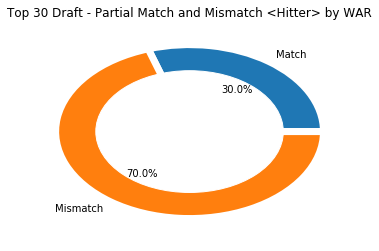

In [29]:
#count data pitcher
partial_count = pd.value_counts(df_ht['선수일치WAR'])
partial_true = partial_count["True"]
partial_false = partial_count["False"]

#pie graph
names = "Match", "Mismatch"
size_partial_ht_war = [partial_true,partial_false]

#import library
import matplotlib.pyplot as pyplt

pyplt.pie(size_partial_ht_war, labels = names, autopct='%.1f%%',wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' } )
pyplt.title("Top 30 Draft - Partial Match and Mismatch <Hitter> by WAR")

circle = pyplt.Circle ( (0,0), 0.7, color = "white")
p = pyplt.gcf()
p.gca().add_artist(circle)

pyplt.show()

#### 4.3.2 woBA(Hitter) & FIP(Pitcher)

In [30]:
#rerank hitter order by wOBA
woba_ht = hitter.sort_values(by='wOBA',ascending=False)
woba_ht['순위'] = woba_ht['wOBA'].rank(ascending=False)
woba_ht['순위'] = woba_ht['순위'].astype(int)

#match player's name
df_ht['선수일치wOBA'] = df_ht['이름'].isin(woba_ht['이름'].head(30)).astype(str)
df_ht.head(30)

,순위,이름,학교,포지션,선수일치WAR,선수일치wOBA
0,1,강백호,서울고,포수,True,True
1,2,김형준,세광고,포수,False,False
2,3,이재원,서울고,외야수,True,False
3,4,예진원,경남고,외야수,True,False
4,5,오영수,오영수,내야수,True,False
5,6,정은원,인천고,내야수,False,False
6,7,최현준,서울고,내야수,True,True
7,8,추재현,신일고,외야수,True,True
8,9,김철호,율곡고,내야수,True,True
9,10,고명성,군산상고,내야수,False,False


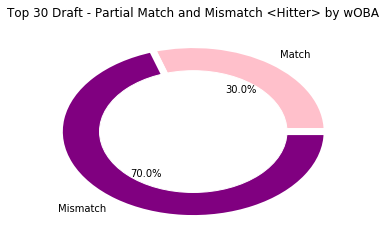

In [31]:
#count data hitter based on wOBA
partial_count = pd.value_counts(df_ht['선수일치wOBA'])
partial_true = partial_count["True"]
partial_false = partial_count["False"]

#pie graph
names = "Match", "Mismatch"
size_partial_ht_woba = [partial_true,partial_false]

#import library
import matplotlib.pyplot as plt

plt.pie(size_partial_ht_woba, labels = names, autopct='%.1f%%',colors = ['pink','purple'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' } )
plt.title("Top 30 Draft - Partial Match and Mismatch <Hitter> by wOBA")

circle = plt.Circle ( (0,0), 0.7, color = "white")
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

In [32]:
#rerank pitcher order by FIP4
fip_pc = pitcher.sort_values(by='FIP',ascending=True)
fip_pc['순위'] = fip_pc['FIP'].rank(ascending=False)
fip_pc['순위'] = fip_pc['순위'].astype(int)

#match player's name
df_pc['선수일치FIP'] = df_pc['이름'].isin(fip_pc['이름'].head(30)).astype(str)
df_pc.head(30)

,순위,이름,학교,포지션,선수일치WAR,선수일치FIP
0,1,양창섭,덕수고,투수,True,True
1,2,이승헌,용마고,투수,True,True
2,3,이승관,야탑고,투수,False,True
3,4,조성훈,청원고,투수,True,False
4,5,김유신,세광고,투수,False,False
5,6,성동현,장충고,투수,False,False
6,7,김선기,상무,투수,False,False
7,8,박신지,경기고,투수,True,True
8,9,최건,장충고,투수,False,False
9,10,김태우,경북고,투수,False,False


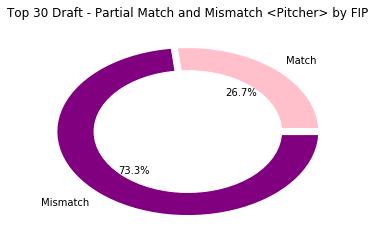

In [33]:
#count data pitcher based on FIP
partial_count = pd.value_counts(df_pc['선수일치FIP'])
partial_true = partial_count["True"]
partial_false = partial_count["False"]

#pie graph
names = "Match", "Mismatch"
size_partial_pc_fip = [partial_true,partial_false]

#import library
import matplotlib.pyplot as plt

plt.pie(size_partial_pc_fip, labels = names, autopct='%.1f%%', colors = ['pink','purple'], wedgeprops = { 'linewidth' : 7,'edgecolor' : 'white' } )
plt.title("Top 30 Draft - Partial Match and Mismatch <Pitcher> by FIP")

circle = plt.Circle ( (0,0), 0.7, color = "white")
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

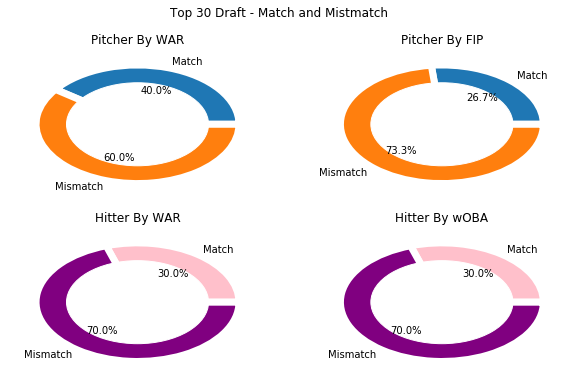

In [34]:
plt.figure(figsize =  (10,6))
plt.subplot(2,2,1)
plt.pie(size_partial_pc_war, labels = names, autopct='%.1f%%',wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' } )
plt.title ( "Pitcher By WAR")
circle = plt.Circle ( (0,0), 0.7, color = "white")
p = plt.gcf()
p.gca().add_artist(circle)

plt.subplot(2,2,2)
plt.pie(size_partial_pc_fip, labels = names, autopct='%.1f%%',wedgeprops = { 'linewidth' : 7,'edgecolor' : 'white' } )
plt.title ( "Pitcher By FIP")
circle = plt.Circle ( (0,0), 0.7, color = "white")
p = plt.gcf()
p.gca().add_artist(circle)


plt.subplot(2,2,3)
plt.pie(size_partial_ht_war, labels = names, autopct='%.1f%%', colors = ['pink','purple'], wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'} )
plt.title ( "Hitter By WAR")
circle = plt.Circle ( (0,0), 0.7, color = "white")
p = plt.gcf()
p.gca().add_artist(circle)

plt.subplot(2,2,4)
plt.pie(size_partial_ht_woba, labels = names, autopct='%.1f%%', colors = ['pink', 'purple'], wedgeprops ={ 'linewidth' : 7, 'edgecolor' : 'white'} )
plt.title ( "Hitter By wOBA")
circle = plt.Circle ( (0,0), 0.7, color = "white")
p = plt.gcf()
p.gca().add_artist(circle)

plt.suptitle("Top 30 Draft - Match and Mistmatch ")
plt.show()

> 투수(Pitcher)의 경우에는 WAR가 FIP에 비해 선수일치도가 상대적으로 높은 것을 보이며 (40% > 26.7%)<br>
> 타자(Hitter)는 일치도가 30%로 동일하다

In [35]:
df1 = df_ht[(df_ht.선수일치WAR == 'True') & (df_ht.선수일치wOBA == 'True')]
pd.value_counts(df1['이름'])

김민기    1
배현호    1
강백호    1
추재현    1
최현준    1
김철호    1
Name: 이름, dtype: int64

In [36]:
df2 = df_pc[(df_pc.선수일치WAR == 'True') & (df_pc.선수일치FIP == 'True')]
pd.value_counts(df2['이름'])

신민혁    1
박신지    1
양창섭    1
최민준    1
이승헌    1
윤강찬    1
Name: 이름, dtype: int64

In [37]:
df3 = df_ht[(df_ht.선수일치WAR == 'False') & (df_ht.선수일치wOBA == 'False')]
pd.value_counts(df3['이름'])

공민규    1
정은원    1
김수환    1
조병규    1
정보근    1
정문근    1
고명성    1
백선기    1
오정환    1
전경원    1
서주원    1
김형준    1
전민재    1
송찬의    1
문장은    1
최보성    1
이원석    1
강동권    1
Name: 이름, dtype: int64

In [38]:
df4 = df_pc[(df_pc.선수일치WAR == 'False') & (df_pc.선수일치FIP == 'False')]
pd.value_counts(df4['이름'])

김승범    1
조선명    1
유호식    1
박주홍    1
배창현    1
김용하    1
임지훈    1
김태우    1
김현     1
성동현    1
김윤수    1
김선기    1
최건     1
김도규    1
김유신    1
이원빈    1
Name: 이름, dtype: int64

## 5. 결론

가정상황
- 타자는 규정타석(40타석) 규정이닝(20이닝)을 기준으로 하여 분석하였다.
- 실제 드래프트 데이터는 지역연고 선수들에 대한 우선지명제도인 1차지명을 제외하고 실질적으로 스탯을 반영한 드래프트인 2차지명 30인을 기준으로 비교하였다.

#### 1. KBO 신인드래프트 고교 투수
  
**WAR 상위 30인의 지표의 매칭률은 40%** 로 **FIP 상위 30인의 지표 매칭률(26.7%)** 보다 높은 매칭률을 보였다. 

이는 상대적으로 선수종합평가기준인 WAR가 다른 기준표에 비해 드래프트 선발과정에 영향을 끼칠 수 있음을 보여준다.

또한 선수 개인의 일치 표에서 확인 할수 있듯이, **WAR 지표와 FIP 지표의 매칭은 거의 동일함**을 보였다.

따라서 *드래프트 고교 투수 지명의 경우 WAR 과 FIP를 비교했을때, WAR의 지표가 비교적 높은 우선순위에 고려됨을 알 수 있다.*  
    
  
#### 2. KBO 신인드래프트 고교 타자

**WAR 상위 30인의 지표의 매칭률은 30%** 로 **wOBA 상위 30인의 지표 매칭률(30%)** 와 동일한 매칭률을 보였다.
  
그러나, 선수 개인의 일치 표에서 확인 되었듯이, **WAR 지표와 wOBA의 매칭이 다르게 나타남**을 보였다. 

상위 라운드에서 지명된 선수 대부분이 **WAR 상위 30인의 지표**에 해당되었지만 wOBA의 경우 그렇지 않았다.  
  
이러한 현상이 발생하는 이유로는 본 분석에서 제시된 WAR,wOBA가 설명하지 못하는 변수들이 있을 수 있음을 말해준다. 


>> ** 종합적으로 판단하였을때 투타 여러 지표들 중 WAR(대체 선수 대비 승리기여도)가 가장 의미가 크다고 말할 수 있다. **

#### 3. 한계점

- 1) 구체적인 데이터의 부재

한국고교야구연맹(http://www.hsbaseball.kr/record/batter.htm) 에서 제공되는 데이터의 경우, WAR 을 계산할때 반영되는 구장 효과, 희생플라이, 고의사구 등 구체적인 스탯이 전혀 제공되지않아 공식계산에 아예 대입하지 못하는 변수들이 존재했다.<br>
이로 인해 계산된 WAR,FIP,wOBA 값에 대한 신뢰도에 영향을 주었다.

또한, 실제 드래프트 데이터와 같이 포지션이 raw data에도 명시되어있었다면, 포지션별 드래프트 랭킹등으로 발전시킬 수 있을 것이다. 

- 2) 실제 드래프트 지명의 외부효과

본 분석에서는 국내 고교야구 선수만을 기준으로 순위를 정렬했으나, **해당 선수들중 MLB 진출, 대학야구 진출** 등 바로 신인 드래프트 선발에 적용되지 않는 선수들이 있었다. 이에 대한 data cleaning 에는 분류된 표가 없어 선수 개별을 검색해서 찾지 않는 이상 알아내기가 어렵다. <br>
이로 인해 선수 순위에 영향을 미치고 자연스레 매칭도가 낮아지는 영향도 유발하였다.

#### 4. For Further Analysis

본 한계점을 극복하기 위해서는 보다 구체적인 선수 스탯과 고교 신인드래프트에 선발될 수 있는 자격을 가진 분류표를 추가한 새로운 raw data가 필요하다. 
이를 통해 국내 프로야구 신인 드래프트에 영향을 가장 크게 미치는 스탯이 어떤것인지 판별하기 수월해질 것으로 생각된다. 


